# Task 2. Algorithms for unconstrained nonlinear optimization. Direct methods.
### Sarafanov Michail, Big Data and Machine Learning, C4134

In [1]:
# Download all the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import math
import timeit 
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
from scipy.optimize import minimize

## The one-dimensional methods of exhaustive search, dichotomy and golden section search to find an approximate solution

In [2]:
# Set functions
def function_1(x):
    return(x**3)

def function_2(x):
    return(abs(x-0.2))

def function_3(x):
    return(x*math.sin(1/x))

### Exhaustive search (brute-force search)

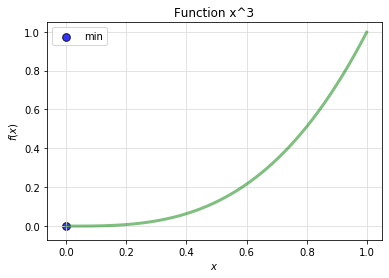

The number of function calculations when searching for the minimum and the number of iterations - 1000
At x - 0.0 1st function takes the minimum value - 0.0 



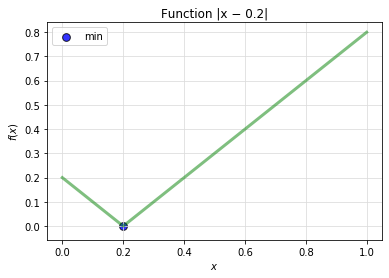

The number of function calculations when searching for the minimum and the number of iterations - 1000
At x - 0.2 2nd function takes the minimum value - 0.0 



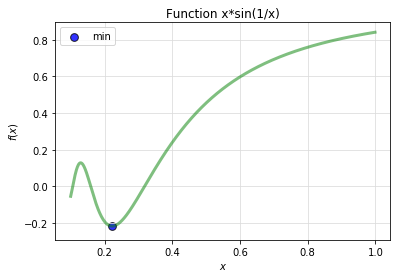

The number of function calculations when searching for the minimum and the number of iterations - 900
At x - 0.223 3rd function takes the minimum value - -0.21722461258083445 



In [3]:
# Set the search function for a suitable value n
def search_n(a,b,E):
    for n in range(1,2000):
        if ((b-a)/n) <= E:
            return(n)
        else:
            pass 

# Implement the exhaustive search algorithm
def exh_min(a,b,n,E,function, name_of_function):
    list_val = []
    for k in range(0,n):
        xk = a + k*((b-a)/n)
        list_val.append(function(xk))
    list_val = np.array(list_val)
    # Find the index of the element in which the function has a minimum
    k = np.argmin(list_val)
    # Get the value of the argument x at the minimum point
    x = a + k*((b-a)/n)
    # Draw a graph
    plt.plot(np.arange(a,b,E),list_val, color='green', linewidth=3, alpha = 0.5)
    plt.scatter(np.arange(a,b,E)[k], min(list_val), s = 60, color='blue', edgecolors = 'black', alpha = 0.8, label = 'min')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.grid(c='#DCDCDC')
    plt.title(name_of_function)
    plt.legend(loc = 'best')
    plt.show()
    print('The number of function calculations when searching for the minimum and the number of iterations -', n)
    return(x, min(list_val))

n = search_n(a = 0, b = 1, E = 0.001) 
x1_min, f1_min = exh_min(a = 0, b = 1, n = n, E = 0.001, function = function_1, name_of_function = 'Function x^3')
print('At x -', x1_min, '1st function takes the minimum value -', f1_min, '\n')
x2_min, f2_min = exh_min(a = 0, b = 1, n = n, E = 0.001, function = function_2, name_of_function = 'Function |x − 0.2|')
print('At x -', x2_min, '2nd function takes the minimum value -', f2_min, '\n')

n = search_n(a = 0.1, b = 1, E = 0.001)  
x3_min, f3_min = exh_min(a = 0.1, b = 1, n = n, E = 0.001, function = function_3, name_of_function = 'Function x*sin(1/x)')
print('At x -', x3_min, '3rd function takes the minimum value -', f3_min, '\n')

### Dichotomy method 

In [4]:
# Set the function
def dich_min(a,b,q,E,function):
    i = 0 # This is needed to count the iterations
    j = 0 # This is needed to calculate the number of function calculations
    while True:
        x1 = (a+b-q)/2
        x2 = (a+b+q)/2

        if function(x1) <= function(x2):
            b = x2
        else:
            a = x1

        i += 1
        j += 2
        if abs(a - b) < E:
            print('Function has a minimum -', function(a), 'at x =', a) 
            print('Number of iterations -', i)
            print('Number of function value calculations -', j, '\n')
            return(function(a))
        else:
            pass

f1_min = dich_min(a = 0, b = 1, q = 0.0005, E = 0.001, function = function_1)
f2_min = dich_min(a = 0, b = 1, q = 0.0005, E = 0.001, function = function_2)
f3_min = dich_min(a = 0.1, b = 1, q = 0.0005, E = 0.001, function = function_3)

Function has a minimum - 0 at x = 0
Number of iterations - 11
Number of function value calculations - 22 

Function has a minimum - 0.0003928222656250646 at x = 0.19960717773437495
Number of iterations - 11
Number of function value calculations - 22 

Function has a minimum - -0.2172247148983749 at x = 0.22210009765624997
Number of iterations - 11
Number of function value calculations - 22 



### Golden section method

In [5]:
# Set the function
def gold_min(a,b,E,function):
    i = 0 # This is needed to count the iterations
    j = 0 # This is needed to calculate the number of function calculations
    x1 = a + ((3-math.sqrt(5))/2)*(b-a)
    x2 = b + ((math.sqrt(5)-3)/2)*(b-a)

    f1 = function(x1)
    f2 = function(x2)
    if f1 <= f2:
        b = x2
        x2 = x1
    else:
        a = x1
        x1 = x2

    i += 1
    j += 2
    while True:
        x1 = a + ((3-math.sqrt(5))/2)*(b-a)
        x2 = b + ((math.sqrt(5)-3)/2)*(b-a)
        
        if f1 <= f2:
            f2 = function(x2)
            b = x2
            x2 = x1
        else:
            f1 = function(x1)
            a = x1
            x1 = x2
        i += 1
        j += 1
        if abs(a - b) < E:
            print('Function has a minimum -', function(a), 'at x =', a) 
            print('Number of iterations -', i)
            print('Number of function value calculations -', j, '\n')
            return(function(a))
        else:
            pass
        
f1_min = gold_min(a = 0, b = 1, E = 0.001, function = function_1)
f2_min = gold_min(a = 0, b = 1, E = 0.001, function = function_2)
f3_min = gold_min(a = 0.1, b = 1, E = 0.001, function = function_3)

Function has a minimum - 0.000733137435857405 at x = 0.09016994374947425
Number of iterations - 15
Number of function value calculations - 16 

Function has a minimum - 0.00029325497434293246 at x = 0.19970674502565708
Number of iterations - 15
Number of function value calculations - 16 

Function has a minimum - -0.21723002735881747 at x = 0.2222632326421293
Number of iterations - 15
Number of function value calculations - 16 



We can say that the most inefficient of the proposed algorithm is a full search algorithm, since when searching for the minimum it is necessary to make many iterations and calculate the value of the function as many times as iterations are made. For the proposed functions and the specified accuracy it is necessary to make several hundred iterations. At the same time, this algorithm can be used for preliminary analysis of functions, the calculation of which is not too "expensive".

The method of dichotomy and the Golden section are similar in many respects, and both algorithms allow to find the minimum quickly enough (for several tens of iterations for the presented functions). The dichotomy method allows you to do less iterations, but the function values will have to be calculated several more times than using the Golden section algorithm.

Alpha - 0.365629057455521
Beta - 0.9527779804282578


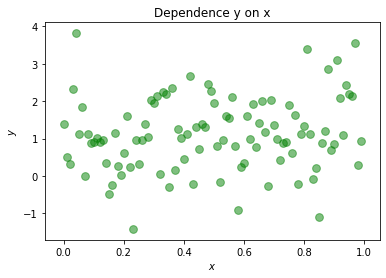

In [25]:
alpha = random.random() # Generate alpha in the range from 0 to 1
beta = random.random() # Generate beta in the range from 0 to 1
print('Alpha -', alpha)
print('Beta -', beta)
# Generate an array of noisy data in accordance with the task
y_list = []
x_list = []
for k in range(0,100):
    x = k/100
    q = random.normalvariate(0, 1)
    y = alpha*x + beta + q
    y_list.append(y)
    x_list.append(x)
x_list = np.array(x_list)
y_list = np.array(y_list)

# Draw a graph
plt.scatter(x_list, y_list, s = 60, color='green', alpha = 0.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Dependence y on x')
plt.show()

In [26]:
# Implement the function of the errors
def f1_error(w):
    a = w[0]
    b = w[1]
    return(sum(((a*x_list + b) - y_list) ** 2))

def f2_error(w):
    a = w[0]
    b = w[1]
    return(sum(((a/(1 + b*x_list)) - y_list) ** 2))

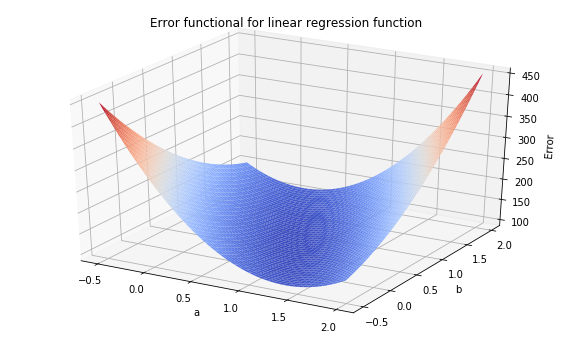

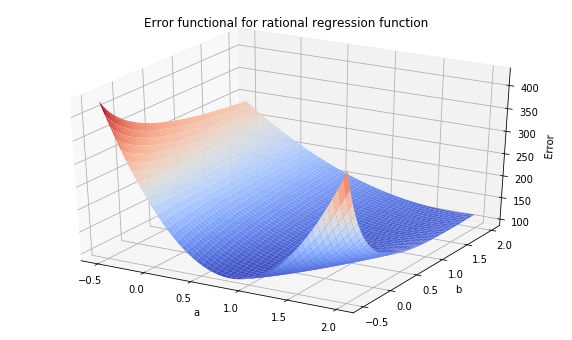

In [27]:
def plot3d_error_function1(function, title):   
    a = np.arange(-0.5, 2, 0.01)
    b = np.arange(-0.5, 2, 0.01)
    # Create a coordinate matrix
    A, B = np.meshgrid(a, b)
    # Create an empty matrix for Z
    Z = np.zeros((len(a), len(b)))
    # For each of the cells we will count the values of the error functional
    for i in range(len(a)):
        for j in range(len(b)):
            Z[i, j] = function([a[i], b[j]])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(A, B, Z, cmap = cm.coolwarm)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('Error')
    plt.title(title)
    plt.show()

def plot3d_error_function2(function, title):   
    a = np.arange(-0.5, 2, 0.01)
    b = np.arange(-0.5, 2, 0.01)
    # Create a coordinate matrix
    A, B = np.meshgrid(a, b)
    # Create an empty matrix for Z
    Z = np.zeros((len(a), len(b)))
    # For each of the cells we will count the values of the error functional
    for i in range(len(a)):
        for j in range(len(b)):
            Z[i, j] = function([a[j], b[i]])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(A, B, Z, cmap = cm.coolwarm)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('Error')
    plt.title(title)
    plt.show()
    
plot3d_error_function1(f1_error, 'Error functional for linear regression function')
plot3d_error_function2(f2_error, 'Error functional for rational regression function')

### Exhaustive search

In [55]:
# Implementation of the search method for the function of two variables
E = 0.001
rranges = (slice(-1, 1, E), slice(-1, 1, E))
print('Linear regression function')
min_1 = optimize.brute(f1_error, rranges)
print(min_1)
a_opt1_exh = min_1[0]
b_opt1_exh = min_1[1]
print('The optimal value of the coefficient a -', a_opt1_exh)
print('The optimal value of the coefficient b -', b_opt1_exh,'\n')

print('Rational regression function')
min_2 = optimize.brute(f2_error, rranges)
a_opt2_exh = min_2[0]
b_opt2_exh = min_2[1]
print('The optimal value of the coefficient a -', a_opt2_exh)
print('The optimal value of the coefficient b -', b_opt2_exh,'\n')

Linear regression function
[0.52540562 0.86224794]
The optimal value of the coefficient a - 0.5254056194752192
The optimal value of the coefficient b - 0.8622479406718185 

Rational regression function
The optimal value of the coefficient a - 0.8628754937393022
The optimal value of the coefficient b - -0.42478866347059 



Since we are looking for the minimum of the function in the range from -1 to 1 (for arguments a and b) by step of 0.001, the amount of iterations is equal to the amount of function calculations - 2000 * 2000 = 4 000 000.

### Gauss method

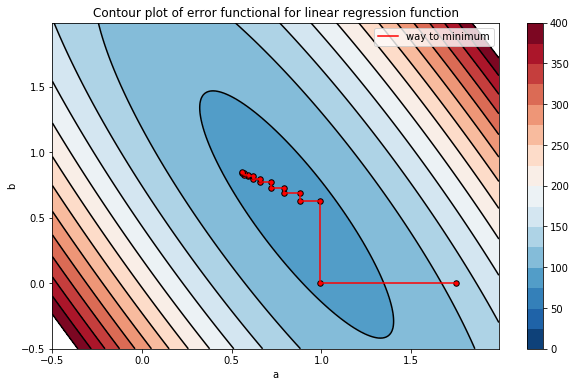

Amount of iterations for searching minimum of linear regression function - 9
Amount of function evaluations for searching minimum of linear regression function - 18000


In [57]:
# Gauss method
def Gauss_descent(x, y, x0, function, step, E, number_iterations = 100):
    iteration = 0
    a = x0[0]
    b = x0[1]
    coords = [[],[]] # Coordinates a and b
    f_values = [] # Approximation of functions
    coords[0].append(a)
    coords[1].append(b)
    f_values.append(function([a,b]))
    
    while iteration < number_iterations:
        # Let's make a function of one argument at a fixed value of b
        const_b_function = lambda a: function([a, b])
        a_items = np.arange(-1, 1, step)
        fk = list(map(const_b_function, a_items))
        fk = np.array(fk)
        index_a_min = np.argmin(fk)
        a_min = a_items[index_a_min]
        
        coords[0].append(a_min)
        b_value = b
        coords[1].append(b_value)
        f_values.append(min(fk))
        a = a_min

        # Fix the value of argument a
        const_a_function = lambda b: function([a, b])
        b_items = np.arange(-0.5, 2, step)
        fk = list(map(const_a_function, b_items))
        fk = np.array(fk)
        index_b_min = np.argmin(fk)
        b_min = b_items[index_b_min]
        
        coords[1].append(b_min)
        a_value = a
        coords[0].append(a_value)
        f_values.append(min(fk))
        b = b_min
        
        if abs(f_values[-1] - f_values[-2]) < E:
            return(f_values, coords, iteration +1)
            exit()
        else:
            iteration += 1
    return(f_values, coords, iteration+1)
    
f1_values, coords_1, amount_iter_1= Gauss_descent(x_list, y_list, [1.75, 0], f1_error, step = 0.01, E = 0.001)

def contour_plot1(function, coords):
    # Let's draw a graph for the linear regression function
    x = np.arange(-0.5, 2, 0.01)
    y = np.arange(-0.5, 2, 0.01)
    # Create a coordinate matrix
    X, Y = np.meshgrid(x, y)
    # Now let's create an empty matrix for Z
    Z = np.zeros((len(x), len(y)))
    # And now for each of the cells we will count the values of the error functional
    for i in range(len(x)):
        for j in range(len(y)):
            Z[i, j] = function([x[i], y[j]]) 
            
    plt.figure(figsize=(10, 6))
    levels = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400]
    contour = plt.contour(X, Y, Z, levels, colors='k')
    contour_filled = plt.contourf(X, Y, Z, levels, cmap="RdBu_r")
    plt.colorbar(contour_filled)
    plt.title('Contour plot of error functional for linear regression function')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.plot(coords[0],coords[1], color='red', label = 'way to minimum')
    plt.scatter(coords[0],coords[1], s = 30, color='red', edgecolors = 'black')
    plt.legend(loc = 'best')
    plt.show()

contour_plot1(f1_error, coords_1)
print('Amount of iterations for searching minimum of linear regression function -', amount_iter_1)
print('Amount of function evaluations for searching minimum of linear regression function -', amount_iter_1*2000)

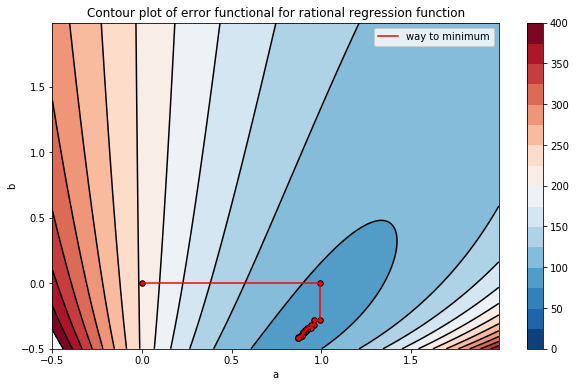

Amount of iterations for searching minimum of rational regression function - 10
Amount of function evaluations for searching minimum of rational regression function - 20000


In [58]:
f2_values, coords_2, amount_iter_2 = Gauss_descent(x_list, y_list, [0,0], f2_error, step = 0.01, E = 0.001)

def contour_plot2(function, coords):
    # Let's draw a graph for the linear regression function
    x = np.arange(-0.5, 2, 0.01)
    y = np.arange(-0.5, 2, 0.01)
    # Create a coordinate matrix
    X, Y = np.meshgrid(x, y)
    # Now let's create an empty matrix for Z
    Z = np.zeros((len(x), len(y)))
    # And now for each of the cells we will count the values of the error functional
    for i in range(len(x)):
        for j in range(len(y)):
            Z[i, j] = function([x[j], y[i]]) 
            
    plt.figure(figsize=(10, 6))
    levels = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400]
    contour = plt.contour(X, Y, Z, levels, colors='k')
    contour_filled = plt.contourf(X, Y, Z, levels, cmap="RdBu_r")
    plt.colorbar(contour_filled)
    plt.title('Contour plot of error functional for rational regression function')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.plot(coords[0],coords[1], color='red', label = 'way to minimum')
    plt.scatter(coords[0],coords[1], s = 30, color='red', edgecolors = 'black')
    plt.legend(loc = 'best')
    plt.show()
    
contour_plot2(f2_error, coords_2)
print('Amount of iterations for searching minimum of rational regression function -', amount_iter_2)
print('Amount of function evaluations for searching minimum of rational regression function -', amount_iter_2*2000)

In [59]:
print('Linear regression function')
a_opt1_gauss = coords_1[0][-1]
b_opt1_gauss = coords_1[1][-1]
print('The optimal value of the coefficient a -', a_opt1_gauss)
print('The optimal value of the coefficient b -', b_opt1_gauss,'\n')

print('Rational regression function')
a_opt2_gauss = coords_2[0][-1]
b_opt2_gauss = coords_2[1][-1]
print('The optimal value of the coefficient a -', a_opt2_gauss)
print('The optimal value of the coefficient b -', b_opt2_gauss,'\n')

Linear regression function
The optimal value of the coefficient a - 0.5600000000000014
The optimal value of the coefficient b - 0.8500000000000012 

Rational regression function
The optimal value of the coefficient a - 0.8700000000000017
The optimal value of the coefficient b - -0.41999999999999993 



### Nelder-Mead method

In [61]:
# Find the minimum for a function of two variables using the Nelder-Mead method
x0 = np.array([0, 0])
print('Linear regression function')
min_1 = minimize(f1_error, x0, method='nelder-mead', options={'disp': True})
a_opt1_NM = min_1.x[0]
b_opt1_NM = min_1.x[1]
print('The optimal value of the coefficient a -', a_opt1_NM)
print('The optimal value of the coefficient b -', b_opt1_NM,'\n')

print('Rational regression function')
min_2 = minimize(f2_error, x0, method='nelder-mead', options={'disp': True})
a_opt2_NM = min_2.x[0]
b_opt2_NM = min_2.x[1]
print('The optimal value of the coefficient a -', a_opt2_NM)
print('The optimal value of the coefficient b -', b_opt2_NM,'\n')

Linear regression function
Optimization terminated successfully.
         Current function value: 92.577976
         Iterations: 75
         Function evaluations: 142
The optimal value of the coefficient a - 0.5253907208477768
The optimal value of the coefficient b - 0.86226262621383 

Rational regression function
Optimization terminated successfully.
         Current function value: 92.147214
         Iterations: 63
         Function evaluations: 124
The optimal value of the coefficient a - 0.8628882876950555
The optimal value of the coefficient b - -0.4247653697795261 



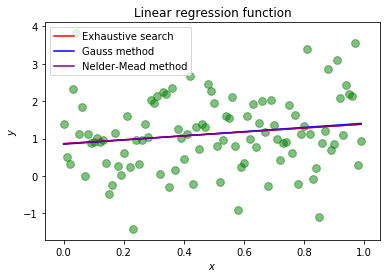

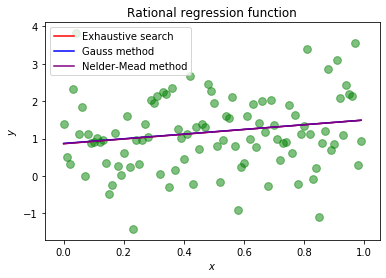

In [62]:
x = np.linspace(min(x_list), max(x_list), 2)
plt.scatter(x_list, y_list, s = 60, color='green', alpha = 0.5)
plt.plot(x, a_opt1_exh*x + b_opt1_exh, c='#FF0000', label = 'Exhaustive search')
plt.plot(x, a_opt1_gauss*x + b_opt1_gauss, c='blue', label = 'Gauss method')
plt.plot(x, a_opt1_NM*x + b_opt1_NM, c='purple', label = 'Nelder-Mead method')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Linear regression function')
plt.legend(loc = 'upper left')
plt.show()

plt.scatter(x_list, y_list, s = 60, color='green', alpha = 0.5)
plt.plot(x, a_opt2_exh/(1 + b_opt2_exh*x), c='#FF0000', label = 'Exhaustive search')
plt.plot(x, a_opt2_gauss/(1 + b_opt2_gauss*x), c='blue', label = 'Gauss method')
plt.plot(x, a_opt2_NM/(1 + b_opt2_NM*x), c='purple', label = 'Nelder-Mead method')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Rational regression function')
plt.legend(loc = 'upper left')
plt.show()

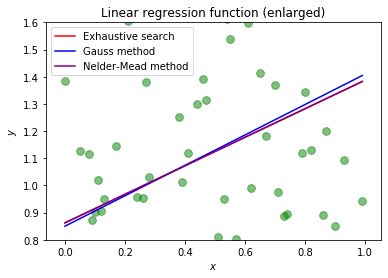

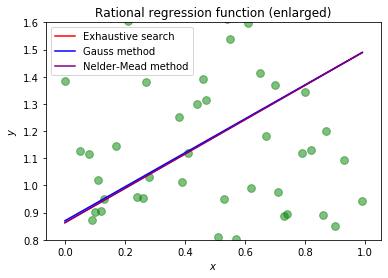

In [63]:
# Let's zoom in on part of the graph
x = np.linspace(min(x_list), max(x_list), 2)
plt.scatter(x_list, y_list, s = 60, color='green', alpha = 0.5)
plt.plot(x, a_opt1_exh*x + b_opt1_exh, c='#FF0000', label = 'Exhaustive search')
plt.plot(x, a_opt1_gauss*x + b_opt1_gauss, c='blue', label = 'Gauss method')
plt.plot(x, a_opt1_NM*x + b_opt1_NM, c='purple', label = 'Nelder-Mead method')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Linear regression function (enlarged)')
plt.legend(loc = 'upper left')
plt.ylim((0.8,1.6))
plt.show()

plt.scatter(x_list, y_list, s = 60, color='green', alpha = 0.5)
plt.plot(x, a_opt2_exh/(1 + b_opt2_exh*x), c='#FF0000', label = 'Exhaustive search')
plt.plot(x, a_opt2_gauss/(1 + b_opt2_gauss*x), c='blue', label = 'Gauss method')
plt.plot(x, a_opt2_NM/(1 + b_opt2_NM*x), c='purple', label = 'Nelder-Mead method')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Rational regression function (enlarged)')
plt.legend(loc = 'upper left')
plt.ylim((0.8,1.6))
plt.show()

As can be seen from the graphs, when using different optimization methods, the values of the coefficients did not much differ (lines are the same). At the same time, optimization algorithm based on the Nelder-Mead method was more efficient, since these algorithm calculated the value of the function fewer times.

Exhaustive search: the amount of iterations is equal to the amount of function calculations - 4 000 000 for Linear regression function and 4 000 000 for Rational regression function.

Gauss method (our champion by amount of iterations that the algorithm performed): the amount of iterations for Linear regression function - 9 and amount of iterations for Rational regression function is 10. Function evaluations - 18000 for Linear regression function and 2000 for Rational regression function.

Nelder-Mead method (our champion by amount of function evaluations): iterations for Linear regression function - 75, for Rational regression function - 63. Function evaluations - 142 for Linear regression function and 124 for Rational regression function.